## loading mnist dataset from local directory

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [9]:
datapath = "../../../datasets/hand-written-dataset/handwritten-digits-images-dataset/dataset/"
print(os.path.exists(datapath))

True


In [10]:
if os.path.exists(datapath)==True:
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                      validation_split=0.2)
    
    test_datagen = ImageDataGenerator(rescale = 1./255)

    train_generator = train_datagen.flow_from_directory(os.path.join(datapath, 'training'),
                                                        #labels='inferred',
                                                        #label_mode = 'categorical',
                                                        target_size = (32, 32),
                                                        batch_size = 128,
                                                        class_mode = 'categorical',
                                                        color_mode = 'rgb',
                                                        subset='training',
                                                       shuffle=True)
    validation_generator = train_datagen.flow_from_directory(os.path.join(datapath, 'training'),
                                                        #labels='inferred',
                                                        #label_mode = 'categorical',
                                                        target_size = (32, 32),
                                                        batch_size = 128,
                                                        class_mode = 'categorical',
                                                        color_mode = 'rgb',
                                                        subset='validation',
                                                        shuffle=True)
    test_generator = test_datagen.flow_from_directory(os.path.join(datapath, 'test'),
                                                        #labels='inferred',
                                                        #label_mode = 'categorical',
                                                        target_size = (32, 32),
                                                        batch_size = 128,
                                                        class_mode = 'categorical',
                                                        color_mode = 'rgb')
    

Found 48013 images belonging to 10 classes.
Found 11997 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [11]:
import matplotlib.pyplot as plt
import numpy as np

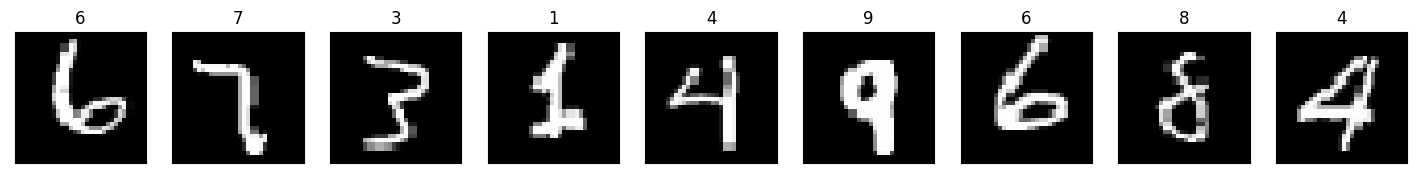

In [12]:
n = 10
plt.figure(figsize=(20, 4))
xtrain, ytrain = next(train_generator)
# samples = iter(enumerate(train_generator), n)
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i])
    ax.title.set_text(np.argmax(ytrain[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    

## loading resnet50 and modifying the model

In [1]:
import tensorflow as tf
# import keras

In [2]:
resnet = tf.keras.applications.ResNet50(weights='imagenet',
                                       input_shape=(32, 32, 3),
                                       include_top=False)
resnet.summary()

94781440/94765736 [==============================] - 26s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                         

In [3]:
print(len(resnet.layers))

175


In [5]:
import keras

In [6]:
resnet.trainable=False
x = resnet.layers[-1].output
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(resnet.input, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())

history = model.fit(train_generator,
                     epochs=5,
                     batch_size=128,
                     validation_data=validation_generator)

Epoch 1/5
376/376 [==============================] - 633s 2s/step - loss: 1.1197 - categorical_accuracy: 0.6958 - val_loss: 0.7323 - val_categorical_accuracy: 0.8056
Epoch 2/5
376/376 [==============================] - 98s 262ms/step - loss: 0.6164 - categorical_accuracy: 0.8366 - val_loss: 0.5525 - val_categorical_accuracy: 0.8480
Epoch 3/5
376/376 [==============================] - 98s 260ms/step - loss: 0.4953 - categorical_accuracy: 0.8628 - val_loss: 0.4811 - val_categorical_accuracy: 0.8631
Epoch 4/5
376/376 [==============================] - 98s 262ms/step - loss: 0.4317 - categorical_accuracy: 0.8791 - val_loss: 0.4244 - val_categorical_accuracy: 0.8809
Epoch 5/5
376/376 [==============================] - 98s 260ms/step - loss: 0.3912 - categorical_accuracy: 0.8892 - val_loss: 0.3811 - val_categorical_accuracy: 0.8937


In [25]:
xtest, ytest = next(test_generator)
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

4/4 [==============================] - 3s 75ms/step - loss: 0.2573 - categorical_accuracy: 0.9453
Accuracy: 0.9453125
Loss:  0.2572901248931885


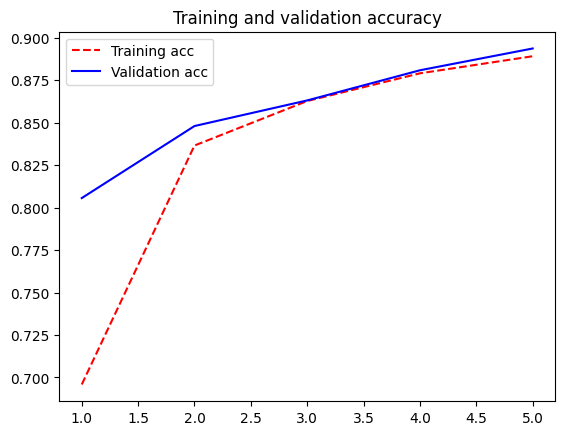

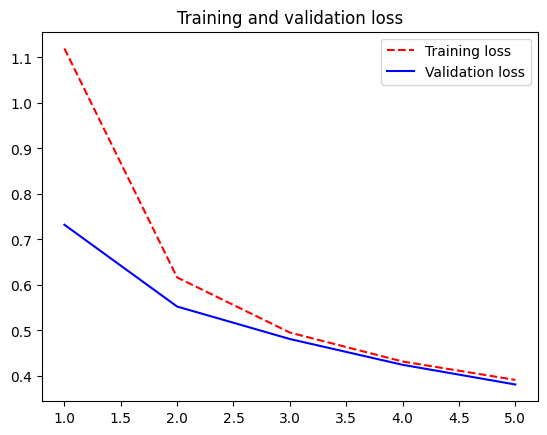

In [16]:
def plot_accuracy_and_loss(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

In [20]:
predictions = model.predict(test_generator)
xtest, ytest = next(test_generator)

(128, 32, 32, 3)


(10000, 10)
(128, 32, 32, 3)
(128, 10)


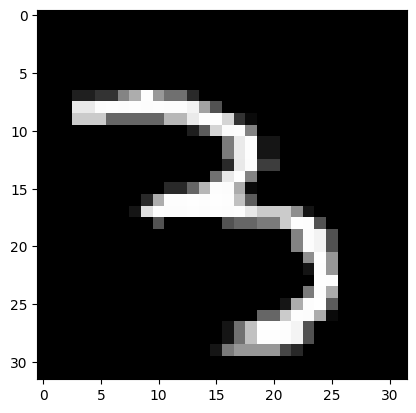

(128, 32, 32, 3)


In [27]:
print(predictions.shape)
print(xtest.shape)
print(ytest.shape)
plt.imshow(xtest[1])
plt.show()
print(xtrain.shape)

In [29]:
start = 50
n = 6
plt.figure(figsize=(20, 4))
for i in range(start, n+1):
    ax = plt.subplot(1, n, i+1-start)
    plt.imshow(xtest[i])
    plt.gray()
    ax.title.set_text("truth-{0} prediction-{1}".format(np.argmax(ytest[i]), np.argmax(predictions[i]) ) )
    
plt.show()

<Figure size 2000x400 with 0 Axes>